## CM3 DATA 가공하기 

In [2]:

# CM3 data로 복습하기 1 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
import sweetviz as sv
from statsmodels.formula.api import ols
import datetime as dt 

import warnings
warnings.filterwarnings("ignore")

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# 분석 연습 파일 불러오기
cm3 = pd.read_excel("d:/novelis/ds2023/CM3_분석연습.xls")
cm3.head(3)

,구분,회수율,시작일시,종료일시,준비시간,작업시간,소요시간(UPTIME),Batch No,YS_TARGET_온도,Make as Alloy,...,GAUGE 3SIGMA,FLATNESS 3SIGMA,ENTRY WEIGHT,2STD 평균속도,2STD 최대속도,2STD BENDING,2STD ROLL FORCE,입측 COIL온도,평균 출측 온도,COIL TEMP DIFF
0,NaN,97.21,2023-01-01 06:27:25,2023-01-01 06:37:00,2.83,6.75,9.58,S843331,165.0,M3104,...,0.82,2.76,11881.0,1109.0,1392.0,14.3,489.0,58.0,142.53360,-22.46640
1,NaN,97.30,2023-01-01 06:37:00,2023-01-01 06:46:01,2.73,6.28,9.01,S843341,165.0,M3104,...,0.78,3.12,11876.0,1180.0,1518.0,16.7,485.0,58.0,142.68825,-22.31175
2,NaN,97.47,2023-01-01 06:46:00,2023-01-01 06:56:10,2.87,7.28,10.15,S841842,170.0,K3104,...,0.77,3.37,12312.0,1242.0,1569.0,38.9,442.0,62.0,142.10706,-27.89294


In [4]:
cm3_a = cm3[['구분','Batch No', '회수율', '시작일시', '종료일시', '준비시간', '작업시간', '소요시간(UPTIME)']]
cm3_b = cm3[['Batch No','시작일시', '종료일시','YS_TARGET_온도', 'Make as Alloy', 'Pass','폭', 'ENTRY GAUGE', 'INTER GAUGE', 'EXIT GAUGE']]
cm3_c = cm3[['Batch No','시작일시', '종료일시','2STD BENDING','2STD 평균속도', '2STD 최대속도', '2STD ROLL FORCE', '입측 COIL온도', '평균 출측 온도']]

In [5]:
# 날짜 바꾸기

# A조: 06:30 ~ 14:30 / B조: 14:30 ~ 22:30 / C조: 22:30 ~ 06:30
# 예: 2023-01-01 05:30:00 작업 이력은 2022-12-31의 작업분 
# 따라서 Day 표시에는 1일이 아닌 31일이어야함 


In [6]:
cm3_b.set_index("시작일시", inplace = True) 

In [7]:
cm3_b.head(3)

,Batch No,종료일시,YS_TARGET_온도,Make as Alloy,Pass,폭,ENTRY GAUGE,INTER GAUGE,EXIT GAUGE
시작일시,,,,,,,,,
2023-01-01 06:27:25,S843331,2023-01-01 06:37:00,165.0,M3104,F,1755.0,1.907,0.729,0.271
2023-01-01 06:37:00,S843341,2023-01-01 06:46:01,165.0,M3104,F,1755.0,1.905,0.729,0.271
2023-01-01 06:46:00,S841842,2023-01-01 06:56:10,170.0,K3104,F,1575.0,2.012,0.735,0.261


In [8]:
# Timedelta: 시간 또는 날짜의 차이를 계산하는 method
# 단, 한번만 동작 후 비활성화로 바꿔야함. 

# cm3_b.index = cm3_b.index - pd.Timedelta(hours=6, minutes=30) 

In [9]:
cm3_b.head(3)

,Batch No,종료일시,YS_TARGET_온도,Make as Alloy,Pass,폭,ENTRY GAUGE,INTER GAUGE,EXIT GAUGE
시작일시,,,,,,,,,
2023-01-01 06:27:25,S843331,2023-01-01 06:37:00,165.0,M3104,F,1755.0,1.907,0.729,0.271
2023-01-01 06:37:00,S843341,2023-01-01 06:46:01,165.0,M3104,F,1755.0,1.905,0.729,0.271
2023-01-01 06:46:00,S841842,2023-01-01 06:56:10,170.0,K3104,F,1575.0,2.012,0.735,0.261


In [10]:
cm3_b["Year"]  = cm3_b.index.year
cm3_b["Month"] = cm3_b.index.month
cm3_b["Day"]   = cm3_b.index.day 

In [11]:
# 데이터 엑셀로 저장하기

# cm3_b.to_excel(excel_writer ="d:/ds2023/data_processing_2023_0831_1600.xlsx",
#                sheet_name   ="cm3_b",
#                header       = True,
#                index        = False)

In [12]:
cm3_b.resample('D')['폭'].mean().round(0)

시작일시
2023-01-01    1702.0
2023-01-02    1742.0
2023-01-03    1695.0
2023-01-04    1707.0
2023-01-05    1698.0
               ...  
2023-08-21    1749.0
2023-08-22    1737.0
2023-08-23    1762.0
2023-08-24    1763.0
2023-08-25    1696.0
Freq: D, Name: 폭, Length: 237, dtype: float64

In [13]:
# 전체 기간에서의 폭 트렌드 데이터 확인

# sns.barplot(x = cm3_b.index,
#             y = cm3_b["폭"])

In [14]:
cm3_b.head(2)


,Batch No,종료일시,YS_TARGET_온도,Make as Alloy,Pass,폭,ENTRY GAUGE,INTER GAUGE,EXIT GAUGE,Year,Month,Day
시작일시,,,,,,,,,,,,
2023-01-01 06:27:25,S843331,2023-01-01 06:37:00,165.0,M3104,F,1755.0,1.907,0.729,0.271,2023,1,1
2023-01-01 06:37:00,S843341,2023-01-01 06:46:01,165.0,M3104,F,1755.0,1.905,0.729,0.271,2023,1,1


In [15]:
cm3_b.columns

Index(['Batch No', '종료일시', 'YS_TARGET_온도', 'Make as Alloy', 'Pass', '폭',
       'ENTRY GAUGE', 'INTER GAUGE', 'EXIT GAUGE', 'Year', 'Month', 'Day'],
      dtype='object')

In [16]:
c1 = pd.DataFrame(cm3_b)
c1

,Batch No,종료일시,YS_TARGET_온도,Make as Alloy,Pass,폭,ENTRY GAUGE,INTER GAUGE,EXIT GAUGE,Year,Month,Day
시작일시,,,,,,,,,,,,
2023-01-01 06:27:25,S843331,2023-01-01 06:37:00,165.0,M3104,F,1755.0,1.907,0.729,0.271,2023,1,1
2023-01-01 06:37:00,S843341,2023-01-01 06:46:01,165.0,M3104,F,1755.0,1.905,0.729,0.271,2023,1,1
2023-01-01 06:46:00,S841842,2023-01-01 06:56:10,170.0,K3104,F,1575.0,2.012,0.735,0.261,2023,1,1
2023-01-01 06:56:10,S841912,2023-01-01 07:05:21,170.0,K3104,F,1575.0,1.999,0.733,0.261,2023,1,1
2023-01-01 07:05:21,S841911,2023-01-01 07:14:58,170.0,K3104,F,1575.0,2.017,0.735,0.261,2023,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25 08:44:32,NaN,2023-08-25 08:51:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,8,25
2023-08-25 08:51:00,NaN,2023-08-25 08:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,8,25
2023-08-25 13:47:00,NaN,2023-08-25 13:51:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,8,25


In [17]:
c2 = c1[["Year", "Month", "Day", "폭", "Make as Alloy", "Pass"]]
c2

,Year,Month,Day,폭,Make as Alloy,Pass
시작일시,,,,,,
2023-01-01 06:27:25,2023,1,1,1755.0,M3104,F
2023-01-01 06:37:00,2023,1,1,1755.0,M3104,F
2023-01-01 06:46:00,2023,1,1,1575.0,K3104,F
2023-01-01 06:56:10,2023,1,1,1575.0,K3104,F
2023-01-01 07:05:21,2023,1,1,1575.0,K3104,F
...,...,...,...,...,...,...
2023-08-25 08:44:32,2023,8,25,NaN,NaN,NaN
2023-08-25 08:51:00,2023,8,25,NaN,NaN,NaN
2023-08-25 13:47:00,2023,8,25,NaN,NaN,NaN


In [18]:
# 폭이 1575w 인 물량의 데이터
c2.loc[c2.폭 == 1575, :]

,Year,Month,Day,폭,Make as Alloy,Pass
시작일시,,,,,,
2023-01-01 06:46:00,2023,1,1,1575.0,K3104,F
2023-01-01 06:56:10,2023,1,1,1575.0,K3104,F
2023-01-01 07:05:21,2023,1,1,1575.0,K3104,F
2023-01-01 07:14:58,2023,1,1,1575.0,K3104,F
2023-01-01 07:24:26,2023,1,1,1575.0,K3104,F
...,...,...,...,...,...,...
2023-08-25 12:49:05,2023,8,25,1575.0,M3104,F
2023-08-25 12:58:58,2023,8,25,1575.0,M3104,F
2023-08-25 13:08:35,2023,8,25,1575.0,M3104,F


In [19]:
c2["Width"] = c2["폭"].apply(lambda x : "Wide" if x >= 1600 else("Middle" if x >= 1500  else "Narrow"))
c2.head(10)

,Year,Month,Day,폭,Make as Alloy,Pass,Width
시작일시,,,,,,,
2023-01-01 06:27:25,2023,1,1,1755.0,M3104,F,Wide
2023-01-01 06:37:00,2023,1,1,1755.0,M3104,F,Wide
2023-01-01 06:46:00,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 06:56:10,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 07:05:21,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 07:14:58,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 07:24:26,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 07:33:43,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 07:43:21,2023,1,1,1575.0,K3104,F,Middle


In [20]:
c2["width_group"] = pd.cut(c2.폭,
                        bins = np.arange(start = 1000, stop =1910, step = 300),
                        right = False,
                        labels = ["Narrow", "Middle", "Wide"])
c2.tail(5)

,Year,Month,Day,폭,Make as Alloy,Pass,Width,width_group
시작일시,,,,,,,,
2023-08-25 08:44:32,2023,8,25,NaN,NaN,NaN,Narrow,NaN
2023-08-25 08:51:00,2023,8,25,NaN,NaN,NaN,Narrow,NaN
2023-08-25 13:47:00,2023,8,25,NaN,NaN,NaN,Narrow,NaN
2023-08-25 13:51:40,2023,8,25,1840.0,M3104,F,Wide,Wide
2023-08-25 14:09:55,2023,8,25,1791.0,K3104,F,Wide,Wide


In [21]:
del c2["width_group"]
c2

,Year,Month,Day,폭,Make as Alloy,Pass,Width
시작일시,,,,,,,
2023-01-01 06:27:25,2023,1,1,1755.0,M3104,F,Wide
2023-01-01 06:37:00,2023,1,1,1755.0,M3104,F,Wide
2023-01-01 06:46:00,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 06:56:10,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 07:05:21,2023,1,1,1575.0,K3104,F,Middle
...,...,...,...,...,...,...,...
2023-08-25 08:44:32,2023,8,25,NaN,NaN,NaN,Narrow
2023-08-25 08:51:00,2023,8,25,NaN,NaN,NaN,Narrow
2023-08-25 13:47:00,2023,8,25,NaN,NaN,NaN,Narrow


In [22]:
# Alloy 순으로 오름 차순 (문자형)
c2.sort_values(by = "Make as Alloy", ascending = True)

,Year,Month,Day,폭,Make as Alloy,Pass,Width
시작일시,,,,,,,
2023-03-03 11:09:52,2023,3,3,1576.0,B3104,F,Middle
2023-04-12 05:09:38,2023,4,12,1576.0,B3104,F,Middle
2023-04-12 05:18:29,2023,4,12,1576.0,B3104,F,Middle
2023-04-12 05:27:24,2023,4,12,1576.0,B3104,F,Middle
2023-03-16 03:20:01,2023,3,16,1576.0,B3104,F,Middle
...,...,...,...,...,...,...,...
2023-08-25 05:25:00,2023,8,25,NaN,NaN,NaN,Narrow
2023-08-25 07:36:10,2023,8,25,NaN,NaN,NaN,Narrow
2023-08-25 08:44:32,2023,8,25,NaN,NaN,NaN,Narrow


In [23]:
c2.sort_values(by = "폭", ascending = True)

,Year,Month,Day,폭,Make as Alloy,Pass,Width
시작일시,,,,,,,
2023-04-28 14:59:31,2023,4,28,-1750.0,K3104,F,Narrow
2023-02-28 06:36:19,2023,2,28,1265.0,K3104,F,Narrow
2023-02-25 03:57:11,2023,2,25,1270.0,S3104,F,Narrow
2023-02-25 02:52:35,2023,2,25,1270.0,S3104,F,Narrow
2023-02-25 03:05:19,2023,2,25,1270.0,S3104,F,Narrow
...,...,...,...,...,...,...,...
2023-08-25 05:25:00,2023,8,25,NaN,NaN,NaN,Narrow
2023-08-25 07:36:10,2023,8,25,NaN,NaN,NaN,Narrow
2023-08-25 08:44:32,2023,8,25,NaN,NaN,NaN,Narrow


In [24]:
c2.head()

,Year,Month,Day,폭,Make as Alloy,Pass,Width
시작일시,,,,,,,
2023-01-01 06:27:25,2023,1,1,1755.0,M3104,F,Wide
2023-01-01 06:37:00,2023,1,1,1755.0,M3104,F,Wide
2023-01-01 06:46:00,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 06:56:10,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 07:05:21,2023,1,1,1575.0,K3104,F,Middle


In [25]:
# cm3_b = cm3[['Batch No','시작일시', '종료일시','YS_TARGET_온도', 'Make as Alloy', 'Pass','폭', 'ENTRY GAUGE', 'INTER GAUGE', 'EXIT GAUGE']]
# cm3_c = cm3[['Batch No','시작일시', '종료일시','2STD BENDING','2STD 평균속도', '2STD 최대속도', '2STD ROLL FORCE', '입측 COIL온도', '평균 출측 온도']]

In [26]:
# "Batch No"를 Primary key로 데이터 병합

c3 = pd.merge(cm3_b, cm3_c, on = "Batch No", how = "inner")
c3

,Batch No,종료일시_x,YS_TARGET_온도,Make as Alloy,Pass,폭,ENTRY GAUGE,INTER GAUGE,EXIT GAUGE,Year,Month,Day,시작일시,종료일시_y,2STD BENDING,2STD 평균속도,2STD 최대속도,2STD ROLL FORCE,입측 COIL온도,평균 출측 온도
0,S843331,2023-01-01 06:37:00,165.0,M3104,F,1755.0,1.907,0.729,0.271,2023,1,1,2023-01-01 06:27:25,2023-01-01 06:37:00,14.3,1109.0,1392.0,489.0,58.0,142.53360
1,S843341,2023-01-01 06:46:01,165.0,M3104,F,1755.0,1.905,0.729,0.271,2023,1,1,2023-01-01 06:37:00,2023-01-01 06:46:01,16.7,1180.0,1518.0,485.0,58.0,142.68825
2,S841842,2023-01-01 06:56:10,170.0,K3104,F,1575.0,2.012,0.735,0.261,2023,1,1,2023-01-01 06:46:00,2023-01-01 06:56:10,38.9,1242.0,1569.0,442.0,62.0,142.10706
3,S841912,2023-01-01 07:05:21,170.0,K3104,F,1575.0,1.999,0.733,0.261,2023,1,1,2023-01-01 06:56:10,2023-01-01 07:05:21,19.5,1238.0,1617.0,432.0,14.0,146.37471
4,S841911,2023-01-01 07:14:58,170.0,K3104,F,1575.0,2.017,0.735,0.261,2023,1,1,2023-01-01 07:05:21,2023-01-01 07:14:58,7.9,1196.0,1516.0,432.0,81.0,147.28151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17753370,S955555,2023-08-25 13:18:34,170.0,M3104,F,1575.0,1.908,0.715,0.260,2023,8,25,2023-08-25 13:08:35,2023-08-25 13:18:34,11.1,1156.0,1464.0,404.0,58.0,152.75910
17753371,S956442,2023-08-25 13:28:46,170.0,K3104,F,1575.0,1.909,0.716,0.261,2023,8,25,2023-08-25 13:18:34,2023-08-25 13:28:46,9.4,1167.0,1512.0,398.0,50.0,153.95192
17753372,S956441,2023-08-25 13:39:32,170.0,K3104,F,1575.0,1.915,0.710,0.261,2023,8,25,2023-08-25 13:28:46,2023-08-25 13:39:32,9.5,1117.0,1522.0,400.0,50.0,156.65623
17753373,S957406,2023-08-25 14:07:18,165.0,M3104,F,1840.0,1.909,0.707,0.240,2023,8,25,2023-08-25 13:51:40,2023-08-25 14:07:18,42.5,733.0,896.0,601.0,50.0,140.26799


In [27]:
# c3.set_index("시작일시", inplace=True)

In [28]:
c3.columns

Index(['Batch No', '종료일시_x', 'YS_TARGET_온도', 'Make as Alloy', 'Pass', '폭',
       'ENTRY GAUGE', 'INTER GAUGE', 'EXIT GAUGE', 'Year', 'Month', 'Day',
       '시작일시', '종료일시_y', '2STD BENDING', '2STD 평균속도', '2STD 최대속도',
       '2STD ROLL FORCE', '입측 COIL온도', '평균 출측 온도'],
      dtype='object')

In [29]:
c3.drop(columns = ["종료일시_x", "종료일시_y"])
c3.head()

,Batch No,종료일시_x,YS_TARGET_온도,Make as Alloy,Pass,폭,ENTRY GAUGE,INTER GAUGE,EXIT GAUGE,Year,Month,Day,시작일시,종료일시_y,2STD BENDING,2STD 평균속도,2STD 최대속도,2STD ROLL FORCE,입측 COIL온도,평균 출측 온도
0,S843331,2023-01-01 06:37:00,165.0,M3104,F,1755.0,1.907,0.729,0.271,2023,1,1,2023-01-01 06:27:25,2023-01-01 06:37:00,14.3,1109.0,1392.0,489.0,58.0,142.53360
1,S843341,2023-01-01 06:46:01,165.0,M3104,F,1755.0,1.905,0.729,0.271,2023,1,1,2023-01-01 06:37:00,2023-01-01 06:46:01,16.7,1180.0,1518.0,485.0,58.0,142.68825
2,S841842,2023-01-01 06:56:10,170.0,K3104,F,1575.0,2.012,0.735,0.261,2023,1,1,2023-01-01 06:46:00,2023-01-01 06:56:10,38.9,1242.0,1569.0,442.0,62.0,142.10706
3,S841912,2023-01-01 07:05:21,170.0,K3104,F,1575.0,1.999,0.733,0.261,2023,1,1,2023-01-01 06:56:10,2023-01-01 07:05:21,19.5,1238.0,1617.0,432.0,14.0,146.37471
4,S841911,2023-01-01 07:14:58,170.0,K3104,F,1575.0,2.017,0.735,0.261,2023,1,1,2023-01-01 07:05:21,2023-01-01 07:14:58,7.9,1196.0,1516.0,432.0,81.0,147.28151


## 탐색적 데이터 분석 

In [30]:
#데이터의 종류 및 구분

# 범주형 데이터 : 문자, 숫자(숫자의 의미가 없음)
# - 명목형 데이터: 범주의 순서가 의미 없음 
# - 순서형 데이터: 범주의 순서가 의미 있음 
# 수치형 데이터 : 숫자(숫자의 의미가 있음) 
# - 이산형 데이터: 소수점이 의미 없음
# - 연속형 데이터: 소수점이 의미 있음

In [31]:
c3.head()

,Batch No,종료일시_x,YS_TARGET_온도,Make as Alloy,Pass,폭,ENTRY GAUGE,INTER GAUGE,EXIT GAUGE,Year,Month,Day,시작일시,종료일시_y,2STD BENDING,2STD 평균속도,2STD 최대속도,2STD ROLL FORCE,입측 COIL온도,평균 출측 온도
0,S843331,2023-01-01 06:37:00,165.0,M3104,F,1755.0,1.907,0.729,0.271,2023,1,1,2023-01-01 06:27:25,2023-01-01 06:37:00,14.3,1109.0,1392.0,489.0,58.0,142.53360
1,S843341,2023-01-01 06:46:01,165.0,M3104,F,1755.0,1.905,0.729,0.271,2023,1,1,2023-01-01 06:37:00,2023-01-01 06:46:01,16.7,1180.0,1518.0,485.0,58.0,142.68825
2,S841842,2023-01-01 06:56:10,170.0,K3104,F,1575.0,2.012,0.735,0.261,2023,1,1,2023-01-01 06:46:00,2023-01-01 06:56:10,38.9,1242.0,1569.0,442.0,62.0,142.10706
3,S841912,2023-01-01 07:05:21,170.0,K3104,F,1575.0,1.999,0.733,0.261,2023,1,1,2023-01-01 06:56:10,2023-01-01 07:05:21,19.5,1238.0,1617.0,432.0,14.0,146.37471
4,S841911,2023-01-01 07:14:58,170.0,K3104,F,1575.0,2.017,0.735,0.261,2023,1,1,2023-01-01 07:05:21,2023-01-01 07:14:58,7.9,1196.0,1516.0,432.0,81.0,147.28151


In [32]:
c3.columns

Index(['Batch No', '종료일시_x', 'YS_TARGET_온도', 'Make as Alloy', 'Pass', '폭',
       'ENTRY GAUGE', 'INTER GAUGE', 'EXIT GAUGE', 'Year', 'Month', 'Day',
       '시작일시', '종료일시_y', '2STD BENDING', '2STD 평균속도', '2STD 최대속도',
       '2STD ROLL FORCE', '입측 COIL온도', '평균 출측 온도'],
      dtype='object')

In [77]:
c5 = c3[["Make as Alloy", "폭", "ENTRY GAUGE", "EXIT GAUGE", 
         "2STD BENDING","2STD 평균속도", "2STD 최대속도", 
         "2STD ROLL FORCE", "입측 COIL온도", "평균 출측 온도"]]
c5.head(5)

,Make as Alloy,폭,ENTRY GAUGE,EXIT GAUGE,2STD BENDING,2STD 평균속도,2STD 최대속도,2STD ROLL FORCE,입측 COIL온도,평균 출측 온도
0,M3104,1755.0,1.907,0.271,14.3,1109.0,1392.0,489.0,58.0,142.53360
1,M3104,1755.0,1.905,0.271,16.7,1180.0,1518.0,485.0,58.0,142.68825
2,K3104,1575.0,2.012,0.261,38.9,1242.0,1569.0,442.0,62.0,142.10706
3,K3104,1575.0,1.999,0.261,19.5,1238.0,1617.0,432.0,14.0,146.37471
4,K3104,1575.0,2.017,0.261,7.9,1196.0,1516.0,432.0,81.0,147.28151


In [35]:
# 범주형 데이터: Make as Alloy, 폭, ENTRY GAUGE, EXIT GAUGE
# 수치형 데이터: 2STD BENDING, 2STD 평균속도, 2STD 최대속도, 2STD ROLL FORCE, 입측 COIL온도, 평균 출측 온도

In [36]:
# 범주형 데이터 분석: 1개의 열
# 표 = 빈도표 
# 데이터 시각화: 막대 그래프, 원그래프

In [39]:
# 1.1 표(Table) = 빈도표 
# (1) 빈도 

c4 = pd.DataFrame(c4)

In [40]:
c4["Make as Alloy"].value_counts()

Make as Alloy
K3104    14360
M3104    13177
S3104     1486
B3104      244
F5182        8
Name: count, dtype: int64

In [42]:
# (2) 백분율 : (빈도/합계)*100
round(c4["Make as Alloy"].value_counts(normalize=True)*100, ndigits=1)

Make as Alloy
K3104    49.1
M3104    45.0
S3104     5.1
B3104     0.8
F5182     0.0
Name: proportion, dtype: float64

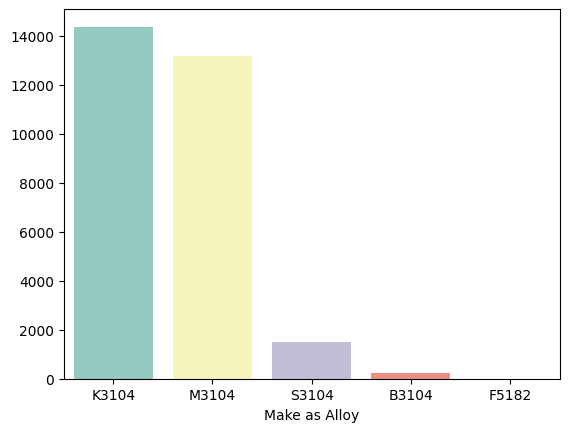

In [79]:
# 1.2 데이터 시각화 : 막대 그래프 

result = c4["Make as Alloy"].value_counts()

# bar 차트그리기

sns.barplot(x = result.index,
            y = result.values)
sns.color_palette()
plt.show()

In [80]:
# 수치형 데이터 분석: 1개의 열
# 표 = 빈도표
# 데이터 시각화: 히스토그램, 상자그림, 바이올린
# 데이터의 요약: 기술통계량 = 요약통계량

In [81]:
c4["2STD 최대속도"].max()

1779.0

In [82]:
# 구간의 정보를 갖는 새로운 열 만들기 
# 2STD 최대속도: 49 ~ 1799 mpm 
# 새로운 열의 이름: speed_group

# 1200 mpm 미만 : "Low"
# 1200 이상 ~ 1500mpm 미만 : "Normal"
# 1500 mpm 이상 : "High" 

In [85]:
c5["speed_group"] = pd.cut(c5["2STD 최대속도"],
                            bins = [0, 1200, 1500, 1800],
                            right = False,
                            labels = ["Low", "Normal", "High"])
c5.head()

,Make as Alloy,폭,ENTRY GAUGE,EXIT GAUGE,2STD BENDING,2STD 평균속도,2STD 최대속도,2STD ROLL FORCE,입측 COIL온도,평균 출측 온도,speed_group
0,M3104,1755.0,1.907,0.271,14.3,1109.0,1392.0,489.0,58.0,142.53360,Normal
1,M3104,1755.0,1.905,0.271,16.7,1180.0,1518.0,485.0,58.0,142.68825,High
2,K3104,1575.0,2.012,0.261,38.9,1242.0,1569.0,442.0,62.0,142.10706,High
3,K3104,1575.0,1.999,0.261,19.5,1238.0,1617.0,432.0,14.0,146.37471,High
4,K3104,1575.0,2.017,0.261,7.9,1196.0,1516.0,432.0,81.0,147.28151,High


In [86]:
# 구간의 빈도 
c5.speed_group.value_counts()

speed_group
Normal    12082
High      10303
Low        4029
Name: count, dtype: int64

In [88]:
# 구간의 백분율
round(c5.speed_group.value_counts(normalize=True)*100, ndigits = 1)

speed_group
Normal    45.7
High      39.0
Low       15.3
Name: proportion, dtype: float64

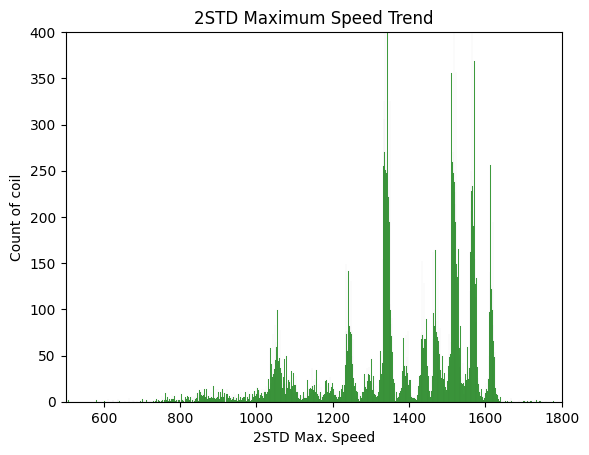

In [102]:
# 1.2 데이터 시각화
# (1) 히스토그램 
sns.histplot(data = c5, 
            x = "2STD 최대속도",
            bins = [0, 1200, 1500, 1800],    # 구간의 정보
            binwidth = 1.2,
            color = "g")
plt.title("2STD Maximum Speed Trend") 
plt.xlabel("2STD Max. Speed")
plt.ylabel("Count of coil")

plt.xlim((500, 1800))
plt.ylim((0, 400))
plt.savefig("CM3 2STD Maximum speed trend")
plt.show()

In [ ]:
# (2) 상자그림
sns.boxplot()